# ASTR 400B
## MW and M31 Halor Merger Remnant: Dark Matter Halo Density Evolution       

Question 1: 
- 1.1: What is the final density profile ?
- 1.2: Is it well fit by a Hernquist profile (Initial Profile) ?        
- 1.3: Is it more or less concetrated than the MW or M31 before they merged ?


In [5]:
# import relevant modules
import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile
from MassProfileMerger import MassProfileMerger

# 1.1 What is the final density profile ?
## Evolution of Dark Matter Halo Density 
- Before Collision -- Snapshot 0 

- Initial Collision -- Snapshot 350 { 5.0 Gyr } via Homework #6 

- Final Collision -- Snapshot 455 { 6.5 Gyr } via Homework #6

- After Collison -- Snapshot 801 ( 11.4 Gyr }


In [6]:
# Create a mass profile object for the Merger using solution to Homework 5
# MassProfile for MW and M31 Merger at 3 different stages 
# Using HighRes files

# Before Collision (Both MW and M31 would be yield the same result so just pick MW)
MP_0 = MassProfile("MW",0) # from Homework #5
# Initial Collisions (Both MW and M31 are not significantly merged ; MW and M31 are ~ 200kpc in separation)
MP_1a = MassProfile("MW",350)
# Final Collision (Both MW and M31 are partially merged)
MP_1 = MassProfileMerger("MW","M31",455)
# After Collision (Both MW and M31 are fully merged)
MP_2 = MassProfileMerger("MW","M31",801)

In [7]:
# Define an array of radii from 1 kpc to 300 kpc in increments of 0.5
R = np.arange(1,300,0.5)

In [8]:
# Mass Profile of Halo
# creating an intance of MassProfile and MassProfileMerger classes

# Before Collision
Mhalo_0 = MP_0.MassEnclosed(1,R).value
# Initial Collision
Mhalo_1a = MP_1a.MassEnclosed(1,R).value
# Final Collison
Mhalo_1 = MP_1.MassEnclosed(1,R).value
# After Collision
Mhalo_2 = MP_2.MassEnclosed(1,R).value

In [9]:
# Set Critical Density (rho_crit) as a Global Variable
# rho_crit = (3.3e11 * 0.6781^2) / 10^9
rho_crit = 151.74 # units of (Msun/kpc^3)

Hernquist Halo Density Profile:

$\rho(r) = \frac{M_{halo}}{2\pi} \frac{a}{r(r+a)^3}$

In [10]:
# From Lab 3:
# Function that computes the Hernquist Halo Density Profile
def rho_Hernquist(r,a,Mhalo):
    """
    Inputs: r is the radius (kpc)
            a is the scale length (kpc)
            Mhalo is the Mass Profile in a certain snapnumber
    Returns: Hernquist Halo Density Profile
    """
    return ((Mhalo*a)/(2*np.pi*r*(r+a)**3))

Local Halo Density Profile:

$\rho(R) = \frac{M_{halo}}{V(R)}$


In [11]:
# Function that computes the Local Halo Density Profile
def rho_local(Mhalo):
    """
    Inputs: Mhalo is the Mass Profile of Halo
    Returns: Local Halo Density Profile associated with Mhalo
    """
    return (Mhalo[1:]-Mhalo[:-1])/((4/3)*np.pi*(R[1:]**3-R[:-1]**3))

In [32]:
# Function that computes the intersection points of 2 curves
def find_roots(x,y):
    """
    Inputs: x and y are the desired curves 
    Returns: The intersection points between curves x and y
    """
    s = np.abs(np.diff(np.sign(y))).astype(bool)
    return x[:-1][s] + np.diff(x)[s]/(np.abs(y[1:][s]/y[:-1][s])+1)

115.3515581073199 kpc 119.15864707737438 kpc 134.63911522823201 kpc 136.29306617505722 kpc


Text(0.65, 0.35, '200*Critical Density')

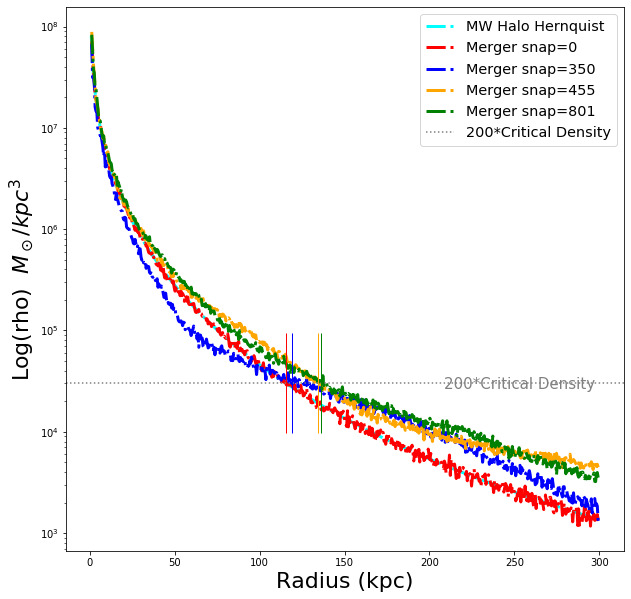

In [14]:
# From Lab 6:
# Plot the Halo Density Profile vs 
# the Hernquist profile
####################################

# Define 200*Critical Density 
y0 = (200*rho_crit) 

# Plot Dimensions 
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the halo luminosity density as a proxy for surface brighntess
#plt.semilogy(R,BulgeI, color='black',linewidth=3, label='Halo Density')

# Hernquist Profile for MW
a_MW = 61 #(obtained from HW#5)
MW_Mhalo = 1.975e12 #(obtained from HW#3)
plt.semilogy(R,rho_Hernquist(R,a_MW,MW_Mhalo), color='cyan', linestyle="-.",linewidth=3, label='MW Halo Hernquist')

# Hernquist Profile for M31
a_M31 = 62 #(obtained from HW#5)
M31_Mhalo = 1.921e12*u.Msun #(obtained from HW#3)
#plt.semilogy(R,Hernquist(R,a_M31,M31_Mhalo), color='blue', linestyle="-.",linewidth=3, label='M31 Halo Hernquist')

# Radius 
r = (R[1:]+R[:-1])/2.0

# Plots of Local Halo Density Profile throughout the key events of the Major Merger event simulation data
# Before Collision
plt.semilogy(r,rho_local(Mhalo_0), color='red', linestyle="-.",linewidth=3, label='Merger snap=0')
# Initial Collision
plt.semilogy(r,rho_local(Mhalo_1a), color='blue', linestyle="-.",linewidth=3, label='Merger snap=350')
# Final Collision
plt.semilogy(r,rho_local(Mhalo_1), color='orange', linestyle="-.",linewidth=3, label='Merger snap=455')
# After Collision
plt.semilogy(r,rho_local(Mhalo_2), color='green', linestyle="-.",linewidth=3, label='Merger snap=801')

# Plot of 200*Critical Denisty (Horizontal Line)
plt.axhline(y0, color = 'grey', linestyle=":", label = '200*Critical Density')

# Calling find_roots function 
# x = r (Radius)
# y = Intesection of Local Halo Density Profile and 200*Critical Density 
#z = find_roots(r, rho_Hernquist(r,a_MW,MW_Mhalo) - y0)
z_0 = find_roots(r,rho_local(Mhalo_0) - y0)
z_1a = find_roots(r,rho_local(Mhalo_1a) - y0)
z_1 = find_roots(r,rho_local(Mhalo_1) - y0)
z_2 = find_roots(r,rho_local(Mhalo_2) - y0)

# Plotting Markers for the first intersection point between the corresponding Local Halo Density Profile and 200*Critical Density
#plt.semilogy(z[0], (np.zeros(len(z))+ int(y0))[0], color='cyan', marker="|", ls="", ms=100)
plt.semilogy(z_0[0], (np.zeros(len(z_0))+ int(y0))[0], color='red', marker="|", ls="", ms=100)
plt.semilogy(z_1a[0], (np.zeros(len(z_1a))+ int(y0))[0], color='blue', marker="|", ls="", ms=100)
plt.semilogy(z_1[0], (np.zeros(len(z_1))+ int(y0))[0], color='orange', marker="|", ls="", ms=100)
plt.semilogy(z_2[0], (np.zeros(len(z_2))+ int(y0))[0], color='green', marker="|", ls="", ms=100)

# Defining the first initial intersection point as the edge of the halo (R_200)
#R200 = z[0]
R200_0 = z_0[0]
R200_1a = z_1a[0]
R200_1 = z_1[0]
R200_2 = z_2[0]
print(R200_0*u.kpc, R200_1a*u.kpc, R200_1*u.kpc, R200_2*u.kpc)
#print(R200*u.kpc)

# adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
#plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)
plt.ylabel('Log(rho)  $M_\odot/kpc^3$', fontsize=22)

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')
#add text figure for 200*Critical Density
plt.figtext(0.65, 0.35, '200*Critical Density', fontsize=15, color='grey')



    


# 1.2: Is it well fit by a Hernquist profile ?


$M(r) =  \frac{M_{halo} r^2}{(a+r)^2}$ 

Step 1: Find the scale length,a that results into the best fit of the Hernquist Halo Mass Profile and the Total Halo particle MassEnclosed as a function of radius  

In [15]:
# Scale Length for MW+M31 Merger
# From Homework #5
# TESTING
###############

# test Radius
RR = 30

# array of radii, not starting at 0.
# intervals of 1 kpc
testR = np.arange(1,RR+1,1.0)

Text(0.15, 0.83, 'Before Merger Mass Profile (MW)')

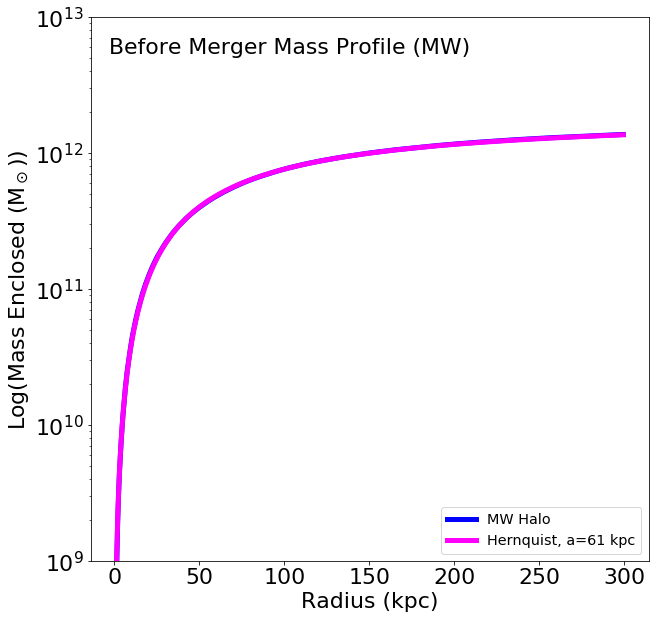

In [16]:
# Testing Code and Hernquist Halo Match
# Merger at 30 kpc
######################################

# scale radius to test
a_0 = 61

# total Halo Mass of MW
MtotMW = 1.975e12 

# Plot the Halo Mass Profile for the MW.
####################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot mass enclosed for Halo 
plt.semilogy(R,MP_0.MassEnclosed(1,R), color='blue', linewidth=5, label='MW Halo ')

# Hernquist Mass Profile
plt.semilogy(R,MP_0.HernquistMass(R,a_0,MtotMW), color='magenta',linewidth=5, label='Hernquist, a=61 kpc')

# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel(r'Log(Mass Enclosed (M$_\odot$))', fontsize=22)

#set axis limits
plt.ylim(1e9,1e13)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='lower right',fontsize='x-large')

#add figure text
plt.figtext(0.15, 0.83, 'Before Merger Mass Profile (MW)', fontsize=22)

# Save to a file
#ax.set_rasterized(True)
#plt.savefig('MassProfile_MW.pdf')

Text(0.15, 0.83, 'Initial Collsion Mass Profile')

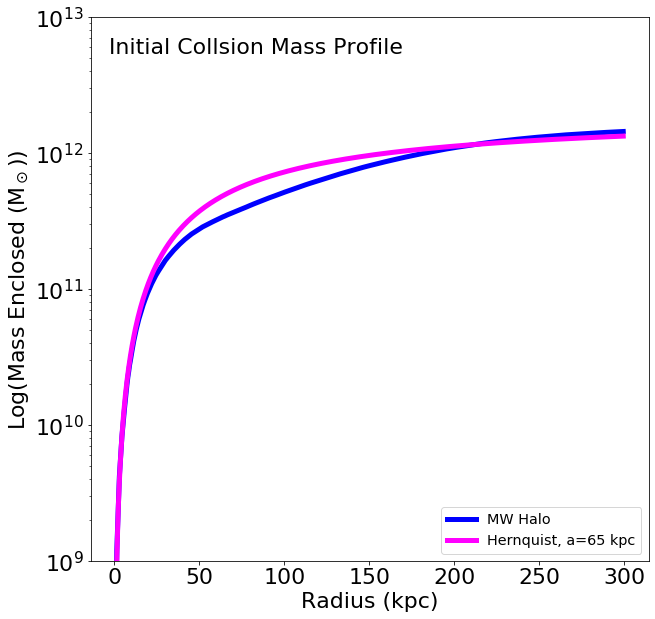

In [17]:
# Testing Code and Hernquist Halo Match
# Merger at 30 kpc
######################################

# scale radius to test
a_1a = 65

# total Halo Mass of MW
MtotMW = 1.975e12 

# Plot the Halo Mass Profile for the MW
####################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot mass enclosed for Halo 
plt.semilogy(R,MP_1a.MassEnclosed(1,R), color='blue', linewidth=5, label='MW Halo')

# Hernquist Mass Profile
plt.semilogy(R,MP_1a.HernquistMass(R,a_1a,MtotMW), color='magenta',linewidth=5, label='Hernquist, a=65 kpc')

# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel(r'Log(Mass Enclosed (M$_\odot$))', fontsize=22)

#set axis limits
plt.ylim(1e9,1e13)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='lower right',fontsize='x-large')

#add figure text
plt.figtext(0.15, 0.83, 'Initial Collsion Mass Profile', fontsize=22)


# Save to a file
#ax.set_rasterized(True)
#plt.savefig('MassProfile_MW.pdf')

Text(0.15, 0.83, 'Final Collision Mass Profile')

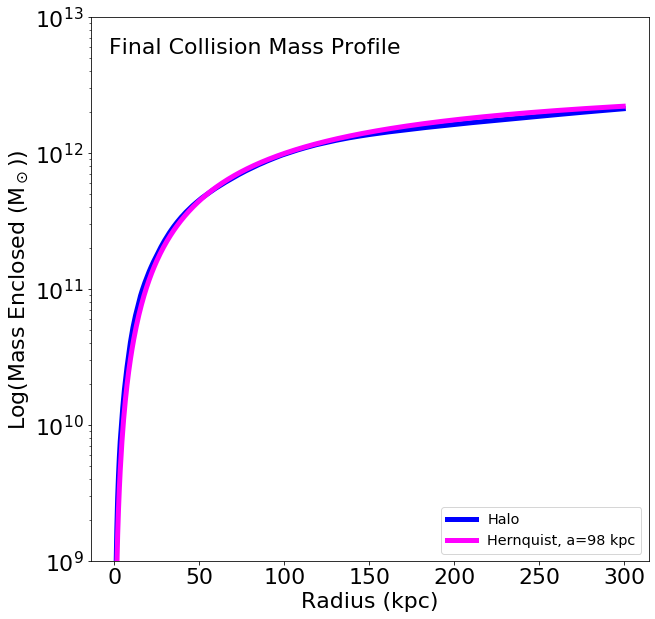

In [18]:
# Testing Code and Hernquist Halo Match
# Merger at 30 kpc
######################################

# scale radius to test
a_1 = 98

# total Halo Mass from Merger (MW Halo Mass + M31 Halo Mass = Merger Halo Mass)
MtotMW = 1.975e12 
MtotM31 = 1.921e12 
MtotMerger = MtotMW + MtotM31
# Plot the Halo Mass Profile for the MW.
####################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot mass enclosed for Halo 
plt.semilogy(R,MP_1.MassEnclosed(1,R), color='blue', linewidth=5, label='Halo')

# Hernquist Mass Profile
plt.semilogy(R,MP_1.HernquistMass(R,a_1,MtotMerger), color='magenta',linewidth=5, label='Hernquist, a=98 kpc')

# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel(r'Log(Mass Enclosed (M$_\odot$))', fontsize=22)

#set axis limits
plt.ylim(1e9,1e13)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='lower right',fontsize='x-large')

#add figure text
plt.figtext(0.15, 0.83, 'Final Collision Mass Profile', fontsize=22)


# Save to a file
#ax.set_rasterized(True)
#plt.savefig('MassProfile_MW.pdf')

Text(0.15, 0.83, 'After Merger Mass Profile')

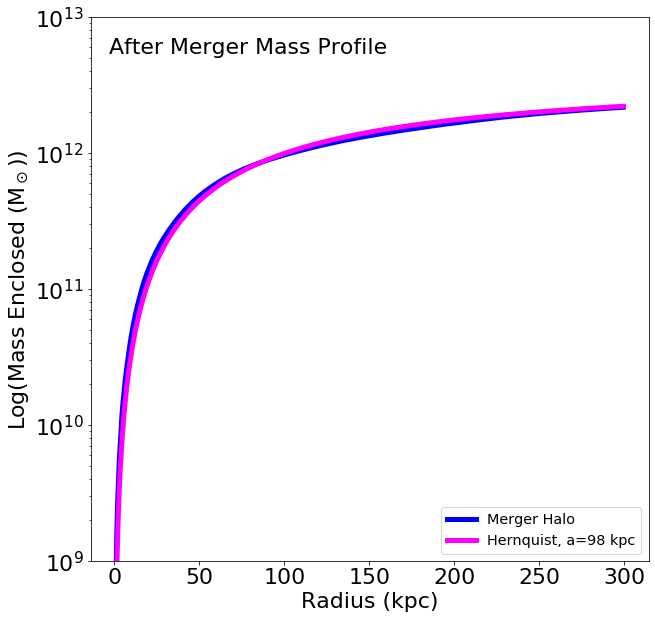

In [19]:
# Testing Code and Hernquist Halo Match
# Merger at 30 kpc
######################################

# scale radius to test
a_2 = 98

# total Halo Mass from Merger (MW Halo Mass + M31 Halo Mass = Merger Halo Mass)
MtotMW = 1.975e12 
MtotM31 = 1.921e12 
MtotMerger = MtotMW + MtotM31
# Plot the Halo Mass Profile for the Merger
####################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot mass enclosed for Halo 
plt.semilogy(R,MP_2.MassEnclosed(1,R), color='blue', linewidth=5, label='Merger Halo')

# Hernquist Mass Profile
plt.semilogy(R,MP_2.HernquistMass(R,a_2,MtotMerger), color='magenta',linewidth=5, label='Hernquist, a=98 kpc')

# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel(r'Log(Mass Enclosed (M$_\odot$))', fontsize=22)

#set axis limits
plt.ylim(1e9,1e13)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='lower right',fontsize='x-large')

#add figure text
plt.figtext(0.15, 0.83, 'After Merger Mass Profile', fontsize=22)


# Save to a files
#ax.set_rasterized(True)
#plt.savefig('MassProfile_MW.pdf')

$\rho(r) = \frac{M_{halo}}{2\pi} \frac{a}{r(r+a)^3}$

Step2: Using the scale length, a plot the Hernquist Halo Density Profile


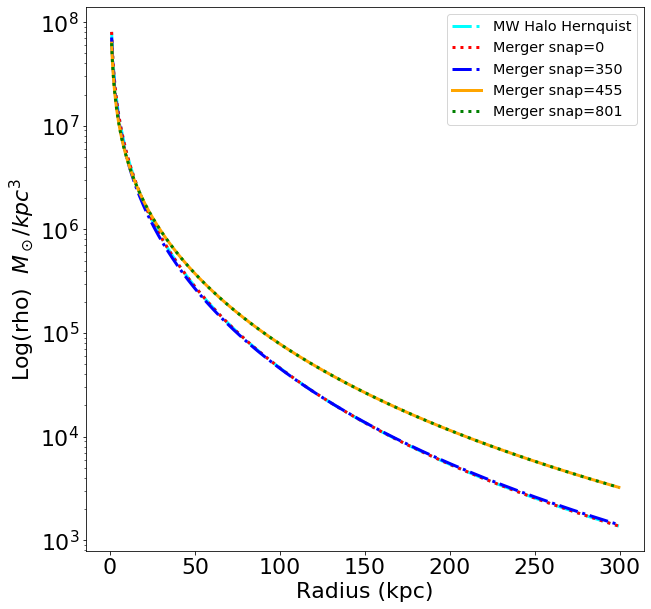

In [20]:
# Plot the Measured Hernquist Halo Density Profile (simulation data) vs 
# the Theoretical Hernquist Profile
####################################

# Plot Dimensions
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Hernquist Profile for MW
a_MW = 61 #(obtained from HW#5)
MW_Mhalo = 1.975e12*u.Msun #(obtained from HW#3)
plt.semilogy(R,rho_Hernquist(R,a_MW,MW_Mhalo), color='cyan', linestyle="-.",linewidth=3, label='MW Halo Hernquist')

# Hernquist Profile for M31
a_M31 = 62 #(obtained from HW#5)
M31_Mhalo = 1.921e12*u.Msun #(obtained from HW#3)

# Hernquist Local Density Profile for Halo Merger
# Before Collision
plt.semilogy(R,rho_Hernquist(R,a_0,MtotMW), color='red', linestyle=":",linewidth=3, label='Merger snap=0')
# Initial Collision
plt.semilogy(R,rho_Hernquist(R,a_1a,MtotMW), color='blue', linestyle="-.",linewidth=3, label='Merger snap=350')
# Final Collision
plt.semilogy(R,rho_Hernquist(R,a_1,MtotMerger), color='orange', linestyle="-",linewidth=3, label='Merger snap=455')
# After Collision
plt.semilogy(R,rho_Hernquist(R,a_2,MtotMerger), color='green', linestyle=":",linewidth=3, label='Merger snap=801')

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
#plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)
plt.ylabel('Log(rho)  $M_\odot/kpc^3$', fontsize=22)

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')



# 1.3: Is it more or less concetrated than the MW or M31 before they merged?

Concentration Pararmeter,

$c =  \frac{R_{200}}{R_{scale}}$


In [21]:
# Function that returns the Concetration Parameter of the galaxy
def Concentration(R200, a):
    """
    Inputs: galaxy, the galaxy filename
    Returns: Concentration Parameter of the galaxy system
    """
    return R200/a

In [22]:
# Concentration Parameters 
print('Before Collision (#0): c = ', Concentration(R200_0,a_0))
print('Initial Collision (#350): c = ', Concentration(R200_1a,a_1a))
print('Final Collision (#455): c = ', Concentration(R200_1,a_1))
print('After Collision (#801): c = ', Concentration(R200_2,a_2))

Before Collision (#0): c =  1.8910091493003263
Initial Collision (#350): c =  1.833209955036529
Final Collision (#455): c =  1.3738685227370613
After Collision (#801): c =  1.3907455732148697
